In [7]:
# import thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [8]:
df = pd.read_csv('data/dataTestKmean.csv')
df.columns = df.columns.str.strip()
df.head()

,x,y
0,1,3
1,1,4
2,1,6
3,2,5
4,2,7


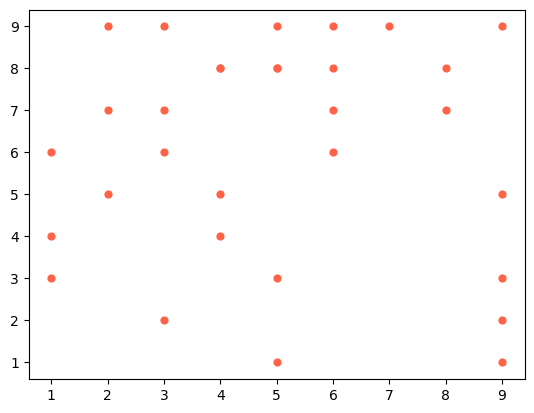

In [10]:
plt.scatter(df['x'], df['y'], c='tomato', s=24)

[[4. 1.]
 [4. 8.]
 [3. 5.]]


Text(0, 0.5, 'y')

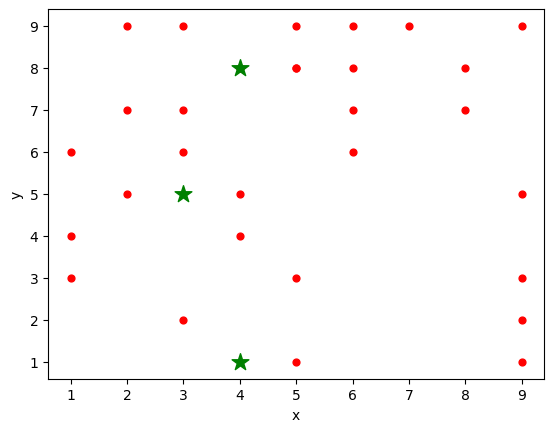

In [12]:
#---let k assume a value---
k = 3
#---create a matrix containing all points---
X = np.array(list(zip(df['x'],df['y'])))
#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)
#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)
#---plot the orginal points as well as the k centroids---
plt.scatter(df['x'], df['y'], c='r', s=24)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")

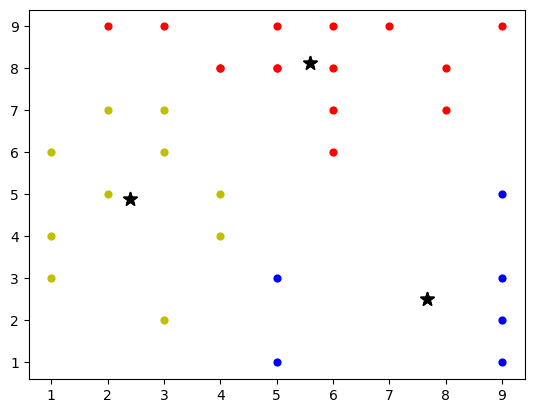

In [14]:
# THUẠT TOAN K-MEANS
from copy import deepcopy

#---to calculate the distance between two points---
def euclidean_distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#---create a matrix of 0 with same dimension as C (centroids)---
C_prev = np.zeros(C.shape)

#---to store the cluster each point belongs to---
clusters = np.zeros(len(X))

#---C is the random centroids and C_prev is all 0s---
#---measure the distance between the centroids and C_prev---
distance_differences = euclidean_distance(C, C_prev)

#---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
    #---assign each value to its closest cluster---
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
        #---returns the indices of the minimum values along an axis---
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    #---store the prev centroids---
    C_prev = deepcopy(C)
    #---find the new centroids by taking the average value---
    for i in range(k): #---k is the number of clusters---
        #---take all the points in cluster i---
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)
    
#---find the distances between the old centroids and the new centroids---
    distance_differences = euclidean_distance(C, C_prev)
    
#---plot the scatter plot---
colors = ['b','r','y','g','c','m']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    else:
    # this means that one of the clusters has no points
     print('Plesae regenerate your centroids again.')
    plt.scatter(points[:, 0], points[:, 1], s=24, c=colors[i])
    plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

In [15]:
for i, cluster in enumerate(clusters):
 print("Point " + str(X[i]),
 "Cluster " + str(int(cluster)))

Point [1 3] Cluster 2
Point [1 4] Cluster 2
Point [1 6] Cluster 2
Point [2 5] Cluster 2
Point [2 7] Cluster 2
Point [2 9] Cluster 1
Point [3 2] Cluster 2
Point [3 6] Cluster 2
Point [3 7] Cluster 2
Point [3 9] Cluster 1
Point [4 8] Cluster 1
Point [4 4] Cluster 2
Point [4 5] Cluster 2
Point [4 8] Cluster 1
Point [5 8] Cluster 1
Point [5 3] Cluster 0
Point [5 1] Cluster 0
Point [5 8] Cluster 1
Point [5 9] Cluster 1
Point [6 6] Cluster 1
Point [6 7] Cluster 1
Point [6 8] Cluster 1
Point [6 9] Cluster 1
Point [7 9] Cluster 1
Point [8 8] Cluster 1
Point [8 7] Cluster 1
Point [9 9] Cluster 1
Point [9 1] Cluster 0
Point [9 2] Cluster 0
Point [9 5] Cluster 0
Point [9 3] Cluster 0


In [16]:
# Using K-Means in Scikit-learn
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(X)

labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_
print(labels)
print(centroids)

[0 0 0 0 0 2 0 0 0 2 2 0 0 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1]
[[2.4        4.9       ]
 [7.66666667 2.5       ]
 [5.6        8.13333333]]


b
r


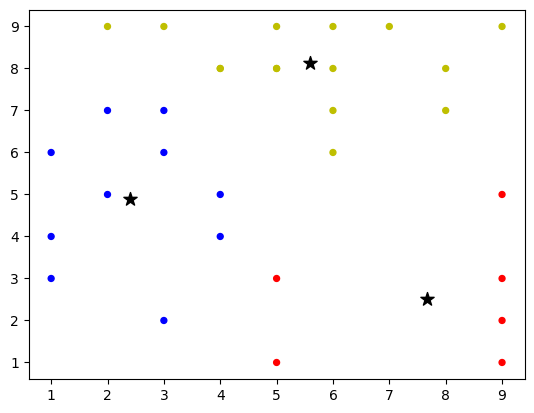

In [17]:
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['x'],df['y'], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
#---making predictions---
cluster = kmeans.predict([[3,4]])[0]
print(c[cluster]) # r
cluster = kmeans.predict([[7,5]])[0]
print(c[cluster]) # y


In [18]:
# Evaluating Cluster Size Using the Silhouette Coefficient

# Calculating the Silhouette Coefficient
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)
print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())

[ 0.55410046  0.59989714  0.50735773  0.60052076  0.31655898  0.04921121
  0.26857898  0.4084135   0.13717522  0.25409926  0.36796177  0.37813881
  0.36304998  0.36796177  0.54766883 -0.06403768  0.17024492  0.54766883
  0.56693943  0.28019822  0.48822296  0.60328917  0.6138114   0.60122817
  0.49015434  0.34564073  0.42616415  0.60387969  0.63150658  0.20816145
  0.57542574]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.4131997579912591


Silhouette Coefficients for k = 2 is 0.3679447719129361
Silhouette Coefficients for k = 3 is 0.4131997579912591
Silhouette Coefficients for k = 4 is 0.3956455011886805
Silhouette Coefficients for k = 5 is 0.35985686727436306
Silhouette Coefficients for k = 6 is 0.35097069393072794
Silhouette Coefficients for k = 7 is 0.33325384289939086
Silhouette Coefficients for k = 8 is 0.37877747100439946
Silhouette Coefficients for k = 9 is 0.34458877831572765
Silhouette Coefficients for k = 10 is 0.3634921022342399
Silhouette Coefficients for k = 11 is 0.3715643528625362
Silhouette Coefficients for k = 12 is 0.3602640059981559
Silhouette Coefficients for k = 13 is 0.34426470632299977
Silhouette Coefficients for k = 14 is 0.3642448442223765
Silhouette Coefficients for k = 15 is 0.34568696558372486
Silhouette Coefficients for k = 16 is 0.32167377821200355
Silhouette Coefficients for k = 17 is 0.3044950135965546
Silhouette Coefficients for k = 18 is 0.2857687341715482
Silhouette Coefficients for k =

C:\Users\THAIHB.B19CN638\AppData\Local\Temp\ipykernel_3640\3041650737.py:6: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


Silhouette Coefficients for k = 30 is 0.12903225806451613
Optimal K is  3


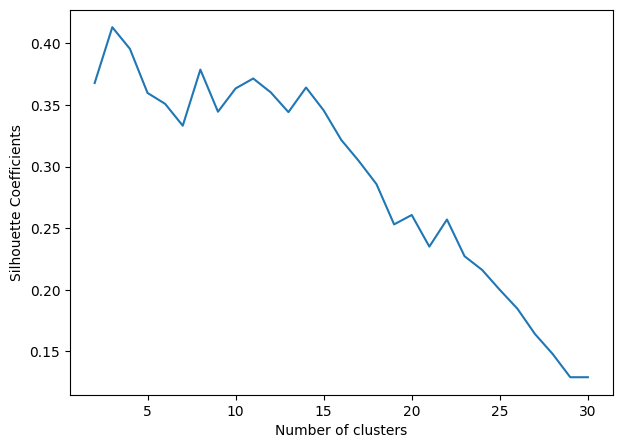

In [19]:
# Finding the Optimal K
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, len(X)):
 kmean = KMeans(n_clusters=k).fit(X)
 score = metrics.silhouette_score(X, kmean.labels_)
 print("Silhouette Coefficients for k =", k, "is", score)
 silhouette_avgs.append(score)
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(X)), silhouette_avgs)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K)